# Cox Model

In [ ]:
import pandas as pd

df=pd.read_csv("/data/df_mock_cox_final.csv")

In [2]:
df=df.drop(columns=["HYPERTEN","DIABETES","HYPERCHO","CVHATT","ALCOHOL","event_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20622 entries, 0 to 20621
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NACCID        20622 non-null  object 
 1   start_date    20622 non-null  object 
 2   event         20622 non-null  int64  
 3   last_date     20622 non-null  object 
 4   time          20622 non-null  int64  
 5   NACCAGE       20622 non-null  int64  
 6   SEX           20622 non-null  int64  
 7   EDUC          20622 non-null  int64  
 8   STROKE        20622 non-null  int64  
 9   TOBAC30       20622 non-null  int64  
 10  NACCBMI       20622 non-null  float64
 11  NACCFAM       20622 non-null  int64  
 12  NACCALZD      20622 non-null  int64  
 13  VISITYR       20622 non-null  int64  
 14  VISITMO       20622 non-null  int64  
 15  VISITDAY      20622 non-null  int64  
 16  BPSYS         20622 non-null  float64
 17  COGMODE       20622 non-null  int64  
 18  DEPD          20622 non-nu

In [3]:
df['SEX'] = df['SEX'].apply(lambda x: 0 if x == 1 else 1)
print(df['SEX'].value_counts())

df['start_date']= pd.to_datetime(df['start_date'])
df['last_date']= pd.to_datetime(df['last_date'])
df['NACCID']=df['NACCID'].astype(str)
df['time'] = (df['last_date'] - df['start_date']).dt.days

SEX
1    12322
0     8300
Name: count, dtype: int64


In [4]:
cols_to_drop = ['start_date', 'last_date','NACCID','NACCALZD','VISITYR','VISITMO','VISITDAY','BPDIAS']  # datetime 컬럼 리스트
df_for_cox = df.drop(columns=cols_to_drop)

In [5]:
df_for_cox.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20622 entries, 0 to 20621
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event         20622 non-null  int64  
 1   time          20622 non-null  int64  
 2   NACCAGE       20622 non-null  int64  
 3   SEX           20622 non-null  int64  
 4   EDUC          20622 non-null  int64  
 5   STROKE        20622 non-null  int64  
 6   TOBAC30       20622 non-null  int64  
 7   NACCBMI       20622 non-null  float64
 8   NACCFAM       20622 non-null  int64  
 9   BPSYS         20622 non-null  float64
 10  COGMODE       20622 non-null  int64  
 11  DEPD          20622 non-null  int64  
 12  MEMORY        20622 non-null  float64
 13  ORIENT        20622 non-null  float64
 14  HYPERTEN_BIN  20622 non-null  int64  
 15  DIABETES_BIN  20622 non-null  int64  
 16  HYPERCHO_BIN  20622 non-null  int64  
 17  CVHATT_BIN    20622 non-null  int64  
 18  ALCOHOL_BIN   20622 non-nu

In [6]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1)  # Penalizer is a regularization term to prevent overfitting
cph.fit(df_for_cox, duration_col='time', event_col='event')
cph.print_summary()

c_index = cph.concordance_index_
print(f"C-index: {c_index:.4f}")

<lifelines.CoxPHFitter: fitted with 20622 total observations, 15602 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 20622
number of events observed = 5020
   partial log-likelihood = -44567.36
         time fit was run = 2025-08-01 02:28:10 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
NACCAGE       0.04      1.04      0.00            0.04            0.04                1.04                1.05
SEX          -0.09      0.92      0.02           -0.13           -0.04                0.87                0.96
EDUC         -0.02      0.98      0.00           -0.03           -0.02                0.97                0.98
STROKE       -0.01      0.99      0.07           -0.16            0.13                0.85                1.14
TOBAC30       0.01      1.01      0.06           -0.10            0.13                0.90                1.14
NACCBMI      -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
NACCFAM       0.12      1.13      0.02            0.08            0.17                1.08                1.19
BPSYS         0.00      1.00      0.00            0.00            0.00                1.00                1.00
COGMODE       0.57      1.77      0.02            0.52            0.61                1.69                1.85
DEPD          0.14      1.15      0.03            0.08            0.20                1.09                1.22
MEMORY        0.59      1.80      0.04            0.52            0.66                1.67                1.94
ORIENT       -0.17      0.85      0.04           -0.25           -0.08                0.78                0.92
HYPERTEN_BIN  0.06      1.06      0.03            0.01            0.11                1.01                1.12
DIABETES_BIN  0.04      1.04      0.04           -0.03            0.11                0.97                1.12
HYPERCHO_BIN  0.05      1.05      0.02            0.00            0.10                1.00                1.10
CVHATT_BIN    0.04      1.04      0.06           -0.07            0.15                0.93                1.16
ALCOHOL_BIN  -0.07      0.93      0.06           -0.19            0.05                0.83                1.05

              cmp to     z      p  -log2(p)
covariate                                  
NACCAGE         0.00 31.80 <0.005    734.74
SEX             0.00 -3.46 <0.005     10.83
EDUC            0.00 -5.97 <0.005     28.68
STROKE          0.00 -0.17   0.87      0.20
TOBAC30         0.00  0.25   0.81      0.31
NACCBMI         0.00 -3.79 <0.005     12.67
NACCFAM         0.00  5.03 <0.005     20.96
BPSYS           0.00  2.38   0.02      5.85
COGMODE         0.00 24.73 <0.005    446.06
DEPD            0.00  4.73 <0.005     18.75
MEMORY          0.00 15.56 <0.005    178.91
ORIENT          0.00 -4.01 <0.005     14.00
HYPERTEN_BIN    0.00  2.42   0.02      6.01
DIABETES_BIN    0.00  1.09   0.27      1.87
HYPERCHO_BIN    0.00  1.97   0.05      4.37
CVHATT_BIN      0.00  0.63   0.53      0.92
ALCOHOL_BIN     0.00 -1.17   0.24      2.05
---
Concordance = 0.76
Partial AIC = 89168.73
log-likelihood ratio test = 2608.07 on 17 df
-log2(p) of ll-ratio test = inf

C-index: 0.7565


In [7]:
print(df_for_cox['ORIENT'].value_counts())
print(df_for_cox.groupby('ORIENT')['event'].mean())

print(df_for_cox['MEMORY'].value_counts())
print(df_for_cox.groupby('MEMORY')['event'].mean())

ORIENT
0.0    18074
0.5     1726
1.0      621
2.0      139
3.0       62
Name: count, dtype: int64
ORIENT
0.0    0.227122
0.5    0.415411
1.0    0.272142
2.0    0.172662
3.0    0.080645
Name: event, dtype: float64
MEMORY
0.0    14252
0.5     4749
1.0     1372
2.0      185
3.0       64
Name: count, dtype: int64
MEMORY
0.0    0.182501
0.5    0.399874
1.0    0.346939
2.0    0.200000
3.0    0.109375
Name: event, dtype: float64


In [8]:
cogmode_counts = df_for_cox.groupby('SEX')['COGMODE'].value_counts(normalize=True).unstack()
print(cogmode_counts)


COGMODE         0         1         2         3
SEX                                            
0        0.607470  0.377711  0.006265  0.008554
1        0.782341  0.208245  0.004139  0.005275


In [ ]:
import pandas as pd

bins = [50, 60, 70, 80, 90, 100]
labels = ['50-59', '60-69', '70-79', '80-89', '90+']
df_for_cox['age_group'] = pd.cut(df_for_cox['NACCAGE'], bins=bins, labels=labels, right=False)

# Convert 'age_group' to a categorical type with ordered categories
df_for_cox['age_group'] = df_for_cox['age_group'].astype(pd.CategoricalDtype(categories=labels, ordered=True))

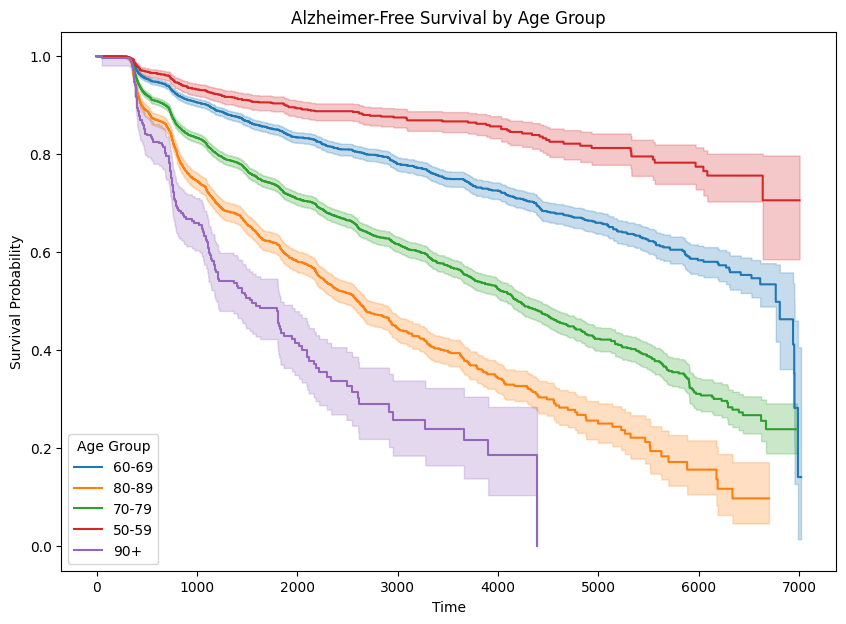

In [14]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(10,7))

for age_group in df_for_cox['age_group'].unique():
    mask = (df_for_cox['age_group'] == age_group)
    if mask.sum() == 0:
        continue
    kmf.fit(durations=df_for_cox.loc[mask, 'time'], 
            event_observed=df_for_cox.loc[mask, 'event'], 
            label=str(age_group))
    kmf.plot_survival_function()
plt.title("Alzheimer-Free Survival by Age Group")

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Age Group')
plt.show()

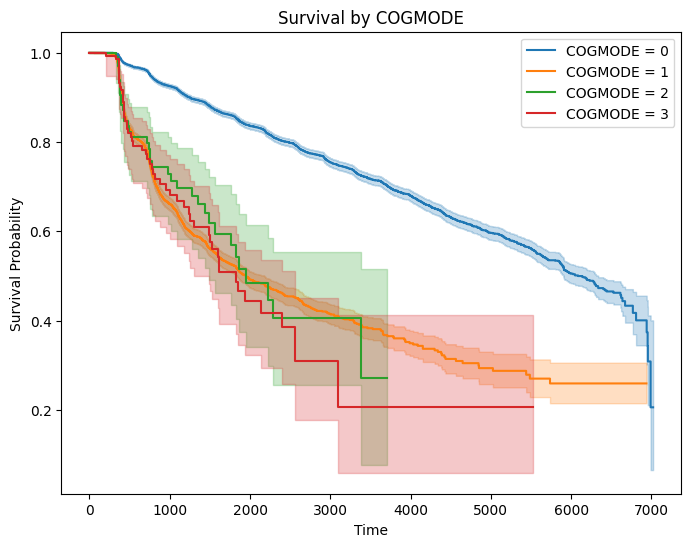

In [15]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))

for cog in sorted(df_for_cox['COGMODE'].unique()):
    mask = (df_for_cox['COGMODE'] == cog)
    kmf.fit(durations=df_for_cox.loc[mask, 'time'],
            event_observed=df_for_cox.loc[mask, 'event'],
            label=f'COGMODE = {cog}')
    kmf.plot_survival_function(ci_show=True)

plt.title('Survival by COGMODE')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()
